<a href="https://www.kaggle.com/code/vincentvandeghinste/mtat26-subwording?scriptVersionId=300236510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 6.1.5 Applying SentencePiece

## 6.1.5.1 Installing the modules

As a first step we need to install the software to enable training the sentence piece model


In [1]:
!pip install sentencepiece
!pip install sacrebleu
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/sentencepiece_train.py
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/rnn_seq2seq.py
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/plot_train_val.py
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/plot_history.py
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 3.9 MB/s eta 0:00:00
--2026-02-26 10:49:15--  https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/sentencepiece_train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255 [text/plain]
Saving to: ‘sentencepiece_train.py’

sentencepiece_train 100%[===================>]     255  --.-KB/s    in 0s      

2026-02-26 10:49:15 (6.73 MB/s) - ‘sentencepiece_train.py’ saved [255/255]

--2026-02-26 10:49:15--  https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/rnn_seq2seq.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

* `!pip install sentencepiece` installs the sentencepiece python module
* `!pip install sacrebleu` installs the sacrebleu python module
* `sentencepiece_train.py` is a script to make our lives easier when we need to train a SentencePiece model. It takes three arguments:
   * The input corpus to learn from
   * The prefix of the output file name it writes the model to
   * Optionally, the maximum vocabulary size (set by default to 8000).
* We also install the `rnn_seq2seq.py`, `plot_train_val.py` and `plot_history.py` scripts from the previous session
* `from IPython.display import Image, display` allows us to display the charts


## 6.1.5.2 Training the SentencePiece model

We need to train the sentencepiece models so the rnn_seq2seq.py script can use them to subword the data. We do not need to apply the subwording to the data.

We do this for the source and target language separately

The `sentencepiece_train.py` script requires two arguments, a third argument is optional:
* corpus to train on
* name of the prefix of the output files where the model is written
* optional: vocabulary size (default = 8000)

In [2]:
!python sentencepiece_train.py /kaggle/input/tatoeba-en-nl/train.en spm.en

!python sentencepiece_train.py /kaggle/input/tatoeba-en-nl/train.nl spm.nl

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: /kaggle/input/tatoeba-en-nl/train.en
  input_format: 
  model_prefix: spm.en
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 1
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_different

## 6.1.5.3 Training the MT system

Similarly to the previous chapter we train the NMT system, with the same options as before. We
just add `--subword-type unigram` to tell the system that we want it to work with SentencePiece
unigrams, and then the `--src-sp-model` and `--tgt-sp-model` options that point to the model files
generated by the training step, for the source and target language respectively.

In [3]:
!python rnn_seq2seq.py --src-file /kaggle/input/tatoeba-en-nl/train.en \
--tgt-file /kaggle/input/tatoeba-en-nl/train.nl \
--src-val /kaggle/input/tatoeba-en-nl/dev.en \
--tgt-val /kaggle/input/tatoeba-en-nl/dev.nl \
--rnn-type lstm \
--epochs 10 \
--save blstm_att_sp.pt \
--show-val-examples 5 \
--eval-metrics \
--lower \
--bidirectional \
--history-json blstm_att_sp.hist \
--attention luong \
--subword-type unigram \
--src-sp-model spm.en.model \
--tgt-sp-model spm.nl.model

Setting random seed to 42
Using SentencePiece subwords (unigram) from spm.en.model / spm.nl.model
Loaded 1000 validation sentence pairs.
Source vocab size: 6439
Target vocab size: 6858
[info] lower = True
Loaded 77381 training pairs. 74129 used after max_len=20 filtering. 
Total trainable parameters: 3,338,762
Epoch 01: train NLL=4.3014 (ppl=73.80)  val NLL=4.0763 (ppl=58.93)  BLEU=3.00  ChrF=17.14  TER=83.71

--- Example validation translations ---
[1] SRC: nobody reads about my country .
    REF: niemand leest over mijn land .
    HYP: wildet mijn land mijn . . . .

[2] SRC: i sleep in my car .
    REF: ik slaap in mijn auto .
    HYP: ik heb mijn mijn mijn .

[3] SRC: there 're clean sheets under the bed .
    REF: er liggen schone lakens onder het bed .
    HYP: zijnen zijn in de . . .

[4] SRC: i have a donkey .
    REF: ik heb een ezel .
    HYP: ik heb een . .

[5] SRC: betty drives fast .
    REF: betty rijdt snel .
    HYP: tenen snel . .

-------------------------------------

## 6.1.5.4 Results

Also like before, we can now again compare training vs validation loss and create the charts that
compare with the previous models. As we are in a new kaggle session, we have created a dataset
that contains the history files built in the previous session, which can be used as input files for
the current session.

Saved plot to blstm_att_sp.png


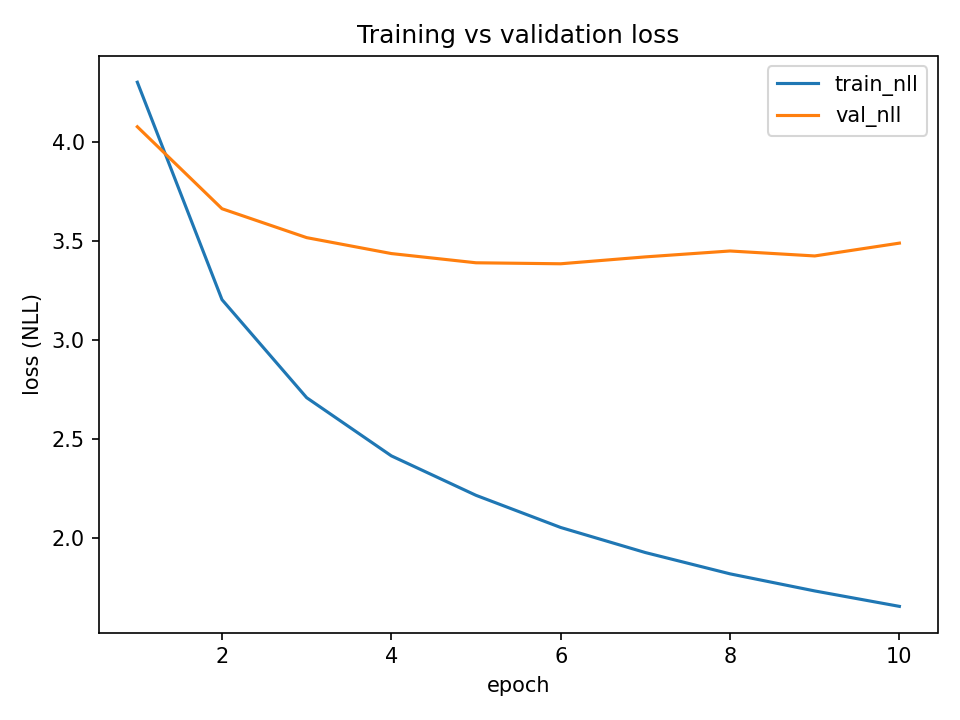

In [4]:
!python plot_train_val.py blstm_att_sp.hist --save blstm_att_sp.png 
display(Image(filename="blstm_att_sp.png"))

The results in above figure show that also here the model overfits, after initial learning for about
thee epochs

### Comparing with previous systems
As we uploaded the `hist` files from the previous run, we can compare the learning history from the current run with it.

Saved plot to rnn_gru_lstm_blstm_att_sp_nll.png


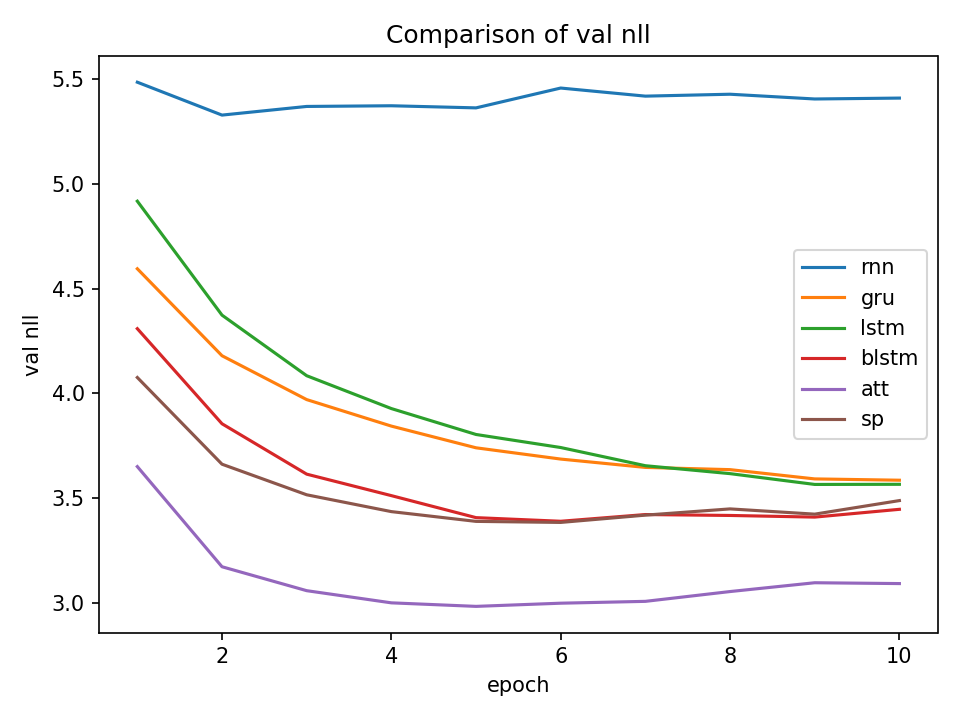

In [5]:
!python plot_history.py /kaggle/input/rnn-seq2seq-histfiles/rnn.hist \
    /kaggle/input/rnn-seq2seq-histfiles/gru.hist \
    /kaggle/input/rnn-seq2seq-histfiles/lstm.hist \
    /kaggle/input/rnn-seq2seq-histfiles/blstm.hist \
    /kaggle/input/rnn-seq2seq-histfiles/blstm_att.hist \
    blstm_att_sp.hist \
    --labels rnn gru lstm blstm att sp \
    --save rnn_gru_lstm_blstm_att_sp_nll.png
display(Image(filename="rnn_gru_lstm_blstm_att_sp_nll.png"))

Saved plot to rnn_gru_lstm_blstm_att_sp_bleu.png


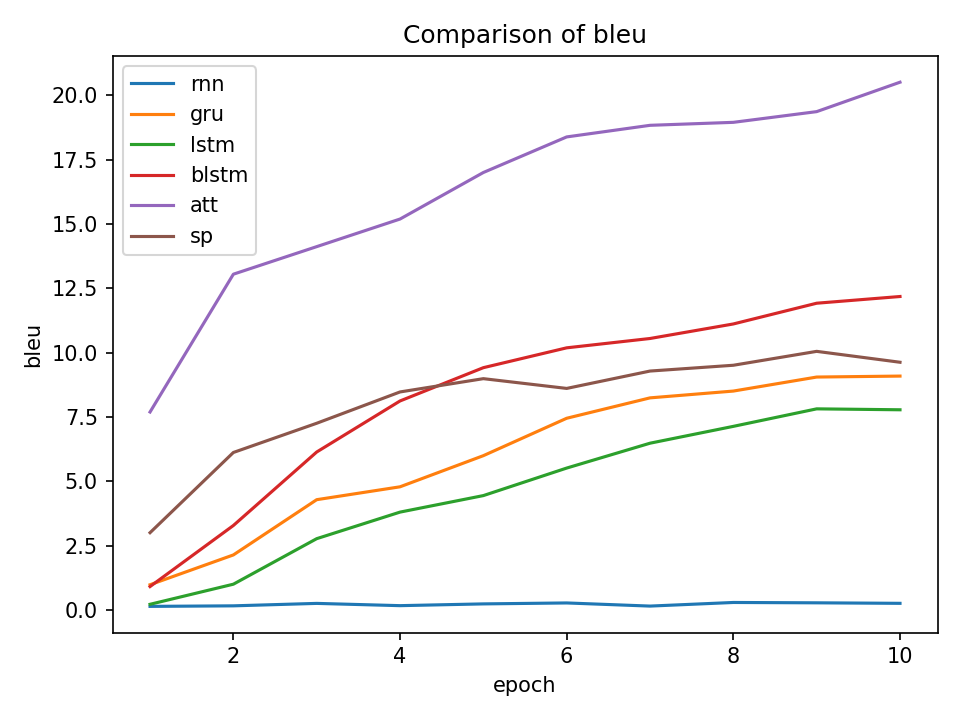

In [6]:
!python plot_history.py /kaggle/input/rnn-seq2seq-histfiles/rnn.hist \
    /kaggle/input/rnn-seq2seq-histfiles/gru.hist \
    /kaggle/input/rnn-seq2seq-histfiles/lstm.hist \
    /kaggle/input/rnn-seq2seq-histfiles/blstm.hist \
    /kaggle/input/rnn-seq2seq-histfiles/blstm_att.hist \
    blstm_att_sp.hist \
    --labels rnn gru lstm blstm att sp \
    --save rnn_gru_lstm_blstm_att_sp_bleu.png \
    --metric bleu
display(Image(filename="rnn_gru_lstm_blstm_att_sp_bleu.png"))

Saved plot to rnn_gru_lstm_blstm_att_sp_chrf.png


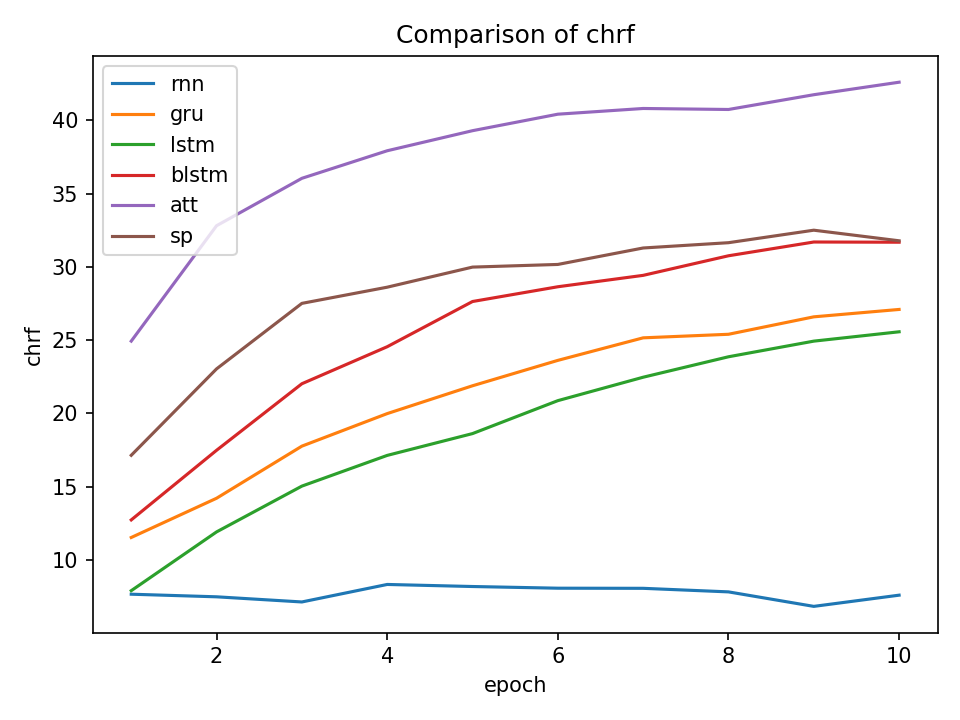

In [7]:
!python plot_history.py /kaggle/input/rnn-seq2seq-histfiles/rnn.hist \
    /kaggle/input/rnn-seq2seq-histfiles/gru.hist \
    /kaggle/input/rnn-seq2seq-histfiles/lstm.hist \
    /kaggle/input/rnn-seq2seq-histfiles/blstm.hist \
    /kaggle/input/rnn-seq2seq-histfiles/blstm_att.hist \
    blstm_att_sp.hist \
    --labels rnn gru lstm blstm att sp \
    --save rnn_gru_lstm_blstm_att_sp_chrf.png \
    --metric chrf
display(Image(filename="rnn_gru_lstm_blstm_att_sp_chrf.png"))

## 6.1.5.5 Training a Joint Vocabulary

In NMT systems (and in multilingual AI systems in general) the subwording is often applied over
languages, i.e. building a single vocabulary over the source and target language.

We can do this through the following steps:
1. Concatenate the two corpora, e.g. with the linux tool `!cat`
2. Train the SentencePiece model on the joint corpus



In [8]:
!cat /kaggle/input/tatoeba-en-nl/train.en /kaggle/input/tatoeba-en-nl/train.nl > train.en_train.nl
!python sentencepiece_train.py train.en_train.nl spm.joint

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: train.en_train.nl
  input_format: 
  model_prefix: spm.joint
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 1
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
 

3. Train the NMT model, using the same joint model for both the `--src-sp-model` and the `--tgt-sp-model`.

In [9]:
# with joint vocab
!python rnn_seq2seq.py --src-file /kaggle/input/tatoeba-en-nl/train.en --tgt-file /kaggle/input/tatoeba-en-nl/train.nl \
--src-val /kaggle/input/tatoeba-en-nl/dev.en --tgt-val /kaggle/input/tatoeba-en-nl/dev.nl \
--rnn-type lstm \
--epochs 10 \
--save blstm_att_sp.pt \
--show-val-examples 5 \
--eval-metrics \
--lower \
--bidirectional \
--history-json blstm_att_spj.hist \
--attention luong \
--subword-type unigram \
--src-sp-model spm.joint.model \
--tgt-sp-model spm.joint.model

Setting random seed to 42
Using SentencePiece subwords (unigram) from spm.joint.model / spm.joint.model
Loaded 1000 validation sentence pairs.
Source vocab size: 4066
Target vocab size: 5247
[info] lower = True
Loaded 77381 training pairs. 73952 used after max_len=20 filtering. 
Total trainable parameters: 2,669,759
Epoch 01: train NLL=4.1907 (ppl=66.07)  val NLL=3.8853 (ppl=48.68)  BLEU=6.25  ChrF=24.14  TER=79.58

--- Example validation translations ---
[1] SRC: nobody reads about my country .
    REF: niemand leest over mijn land .
    HYP: moet over land mijn land

[2] SRC: i sleep in my car .
    REF: ik slaap in mijn auto .
    HYP: ik ben in mijn auto . .

[3] SRC: there 're clean sheets under the bed .
    REF: er liggen schone lakens onder het bed .
    HYP: is zijn zeenen des de .

[4] SRC: i have a donkey .
    REF: ik heb een ezel .
    HYP: ik heb een . .

[5] SRC: betty drives fast .
    REF: betty rijdt snel .
    HYP: tttt snel .

---------------------------------------

We can create the charts again.

Saved plot to blstm_att_spj.png


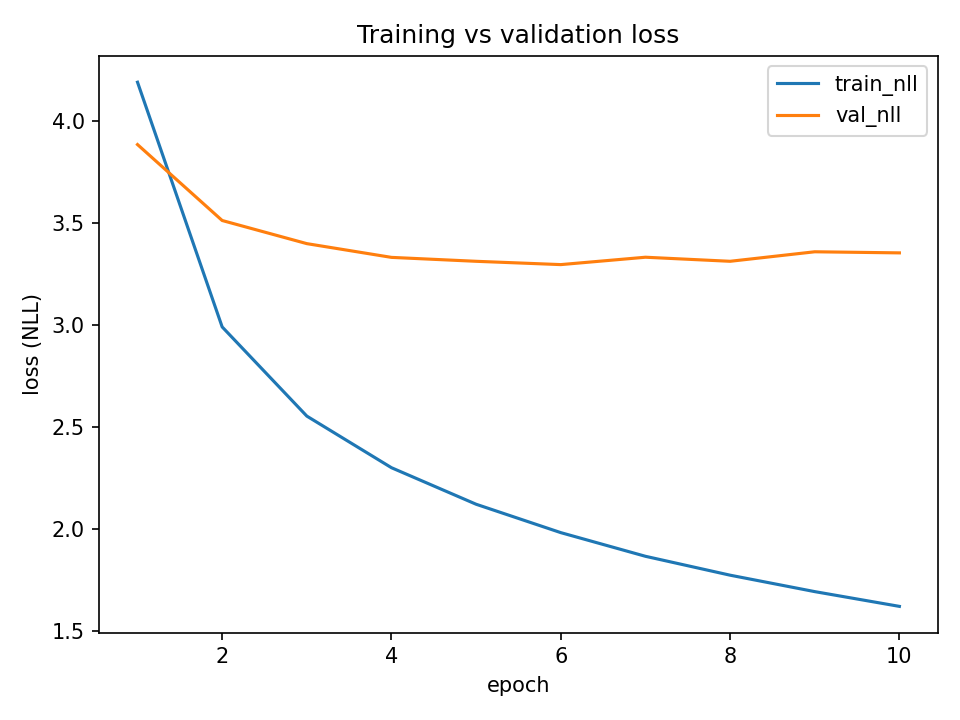

In [10]:
!python plot_train_val.py blstm_att_spj.hist --save blstm_att_spj.png 
display(Image(filename="blstm_att_spj.png"))

Saved plot to spj_nll.png


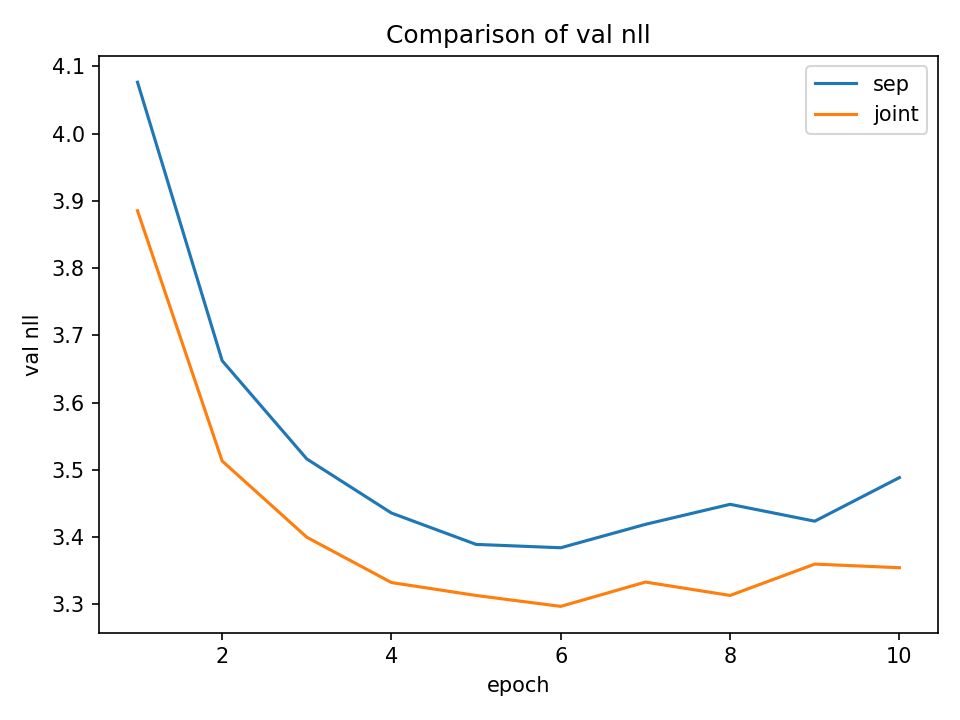

In [11]:
!python plot_history.py blstm_att_sp.hist \
    blstm_att_spj.hist \
    --labels sep joint \
    --save spj_nll.png
display(Image(filename="spj_nll.png"))

Saved plot to spj_bleu.png


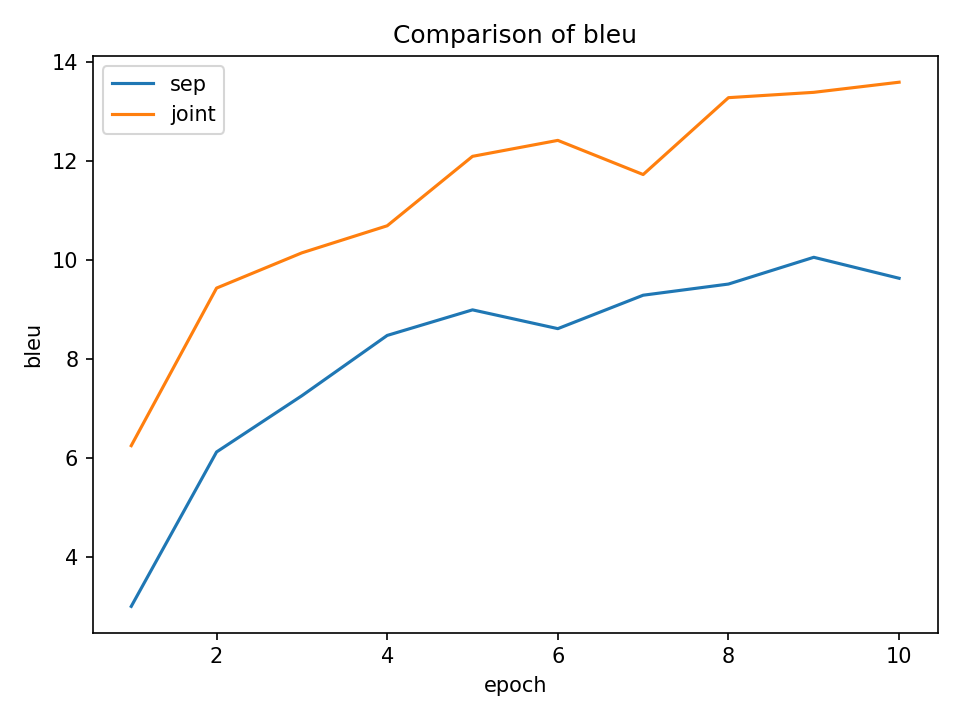

In [12]:
!python plot_history.py blstm_att_sp.hist \
    blstm_att_spj.hist \
    --labels sep joint \
    --save spj_bleu.png \
    --metric bleu
display(Image(filename="spj_bleu.png"))

Similar as above (with separate subwording for source and target) we see that the training overfits. We also see that the
model using the joint subwording approach scores consistently better for NLL, BLEU and chrF.

Saved plot to spj_chrf.png


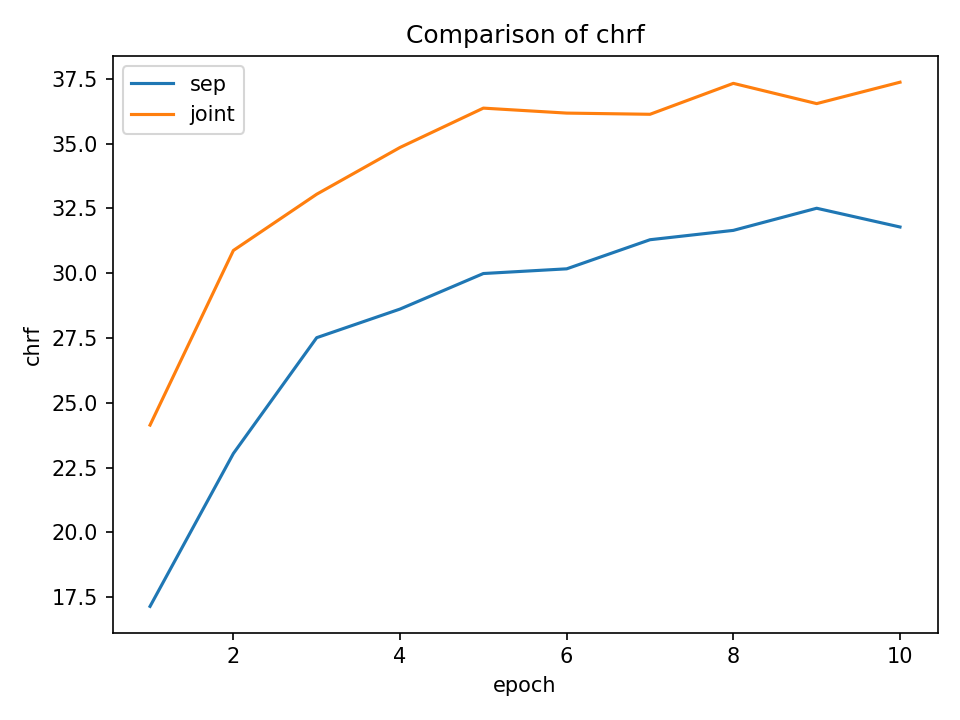

In [13]:
!python plot_history.py blstm_att_sp.hist \
    blstm_att_spj.hist \
    --labels sep joint \
    --save spj_chrf.png \
    --metric chrf
display(Image(filename="spj_chrf.png"))